In [2]:
import pandas as pd
import numpy as np
import re
from string import digits
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import os

In [3]:
from datetime import datetime

def time_now():
    print(datetime.now().strftime('%Y_%m_%d-%H:%M:%S'))

In [4]:
def remove_signs(item):
    pattern = re.compile('[!.,"\'?]*')
    item = pattern.sub('', item)
    return item

In [8]:
# def remove_signs_and_names(item,database, ind=1):
# #     print(ind)
# #     print(database)
# #     print(item)
#     pattern = re.compile('[!\.,"\'\?\(\)]*')
#     item = ' ' + pattern.sub('', item) + ' '
# #     print(item)
#     pattern = re.compile(r"( " + " | ".join(database) + " )")
# #     print(pattern)
#     item = pattern.sub(' ', item)
#     return item

In [48]:
def remove_signs_and_names(item,database, ind=1):
#     print(ind)
#     print(database)
#     print(item)
    pattern = re.compile('[!\.,"\'\?\(\)]*')
    item = ' ' + pattern.sub('', item) + ' '
    return ' '.join(np.setdiff1d(item.split(), database))
    print(np.setdiff1d(item.split(), database))
    pattern = re.compile(r"( " + " | ".join(database) + " )")
#     print(pattern)
    item = pattern.sub('', item)
    return item

In [42]:
nm = ['זה', 'ה', 'ב', 'דן']
remove_signs_and_names('מה שלום עאטף', nm)

['זה', 'ה', 'ב', 'דן']
מה שלום עאטף


'מה עאטף שלום'

In [41]:
remove_signs_and_names('אי אפשר דן ב ה זה ב ה אינטרנט'.replace(' ',' '),nm)

['זה', 'ה', 'ב', 'דן']
אי אפשר דן ב ה זה ב ה אינטרנט


'אי אינטרנט אפשר'

In [34]:
'אי אפשר דן ב ה זה ב ה אינטרנט'.split()

['אי', 'אפשר', 'דן', 'ב', 'ה', 'זה', 'ב', 'ה', 'אינטרנט']

In [37]:
a = ['אי', 'אפשר', 'דן', 'ב', 'ה', 'זה', 'ב', 'ה', 'אינטרנט']
b= ['זה', 'ה', 'ב', 'דן']

np.setdiff1d(a,b)

array(['אי', 'אינטרנט', 'אפשר'], dtype='<U7')

In [46]:
all_communities = pd.DataFrame(columns=['text','label'])
for community_name in ['joy','bowel_diseases']:
    community_content = pd.read_csv('data_lemma/%s_lemma.csv' % (community_name), sep ='\t', encoding='utf-32')
    community_talks = pd.DataFrame(community_content.apply(
        lambda x: remove_signs(' '.join(community_content.loc[x.name,['title']+list(map(str, range(1,25)))].dropna())), axis=1),
             columns=['text'])
    community_talks['label'] = community_name
    all_communities = pd.concat([all_communities,community_talks])
all_communities

,text,label
0,כאב נירופטי מ מקור לא ידע לפני שנה צינור ברזל ...,joy
1,כ ביים ב כול ה גוף היה חבר הוא סבל מ מחלה אוטו...,joy
2,שמיעה מוזיקה הפחית כ ה אב אחרי ניתוח הרבה פחו...,joy
3,כ ה אב ב ה ישיבה מ אזור פה ה טבעת שלום לפני מ...,joy
4,כאב תופת ב ה שן לסת חניכיים ו עוד מ מקור לא יד...,joy
...,...,...
2439,קורונה ו מחלה מעי דלקתי מה צריך ידע עודכן ל ...,bowel_diseases
2440,קרוהן חלה קרוהן ו רצה ידע האם יש סכנה ל שילוב ...,bowel_diseases
2441,תחליף ל ה קורטיפואם היה הוא חלה ב פרוקטיטיס עם...,bowel_diseases
2442,ביולוגי שלום בן עם קוליטיס ו AS טופל סימפון מ...,bowel_diseases


In [11]:
from string import digits

for community_name in ['joy']:#,'bowel_diseases']:
    community_content = pd.read_csv('data_lemma/%s_lemma.csv' % (community_name), sep ='\t', encoding='utf-32')
    names_set = set(community_content.name.str.cat().replace('"', '').translate({ord(k): None for k in digits}
                                                                               ).replace(',', ' ').split())

In [12]:
def get_com_names(community):
    community_content = pd.read_csv('data_lemma/%s_lemma.csv' % (community), sep ='\t', encoding='utf-32')
    return set(community_content.name.str.cat().replace('"', '').translate(
        {ord(k): None for k in digits}).replace(',', ' ').replace('(', ' ').replace(')', ' ').split())
get_com_names('joy')

{'אלמוני',
 'בון',
 'מלי',
 'כ',
 'לול',
 'MAJER',
 'טימסית',
 'קרביץ',
 'ר',
 'AlonpainR',
 'shay',
 'שרוןןן',
 'COHENdaniella',
 'חרות',
 'נ',
 'aaiamar',
 'מריקה',
 'Unick',
 'פאול',
 'stella',
 'ניצן',
 "she's",
 'שרה-מתנדבת',
 'אלה',
 'cidve',
 'אביאל',
 'בוצי',
 'מולאו',
 'מולד',
 'there',
 "ג'ינג'ה",
 'דיני',
 'מייק',
 'פסיכולוגי',
 'צפורה',
 'ציפיק',
 'סלע',
 'שירה',
 'נאסר',
 'גליהבק',
 'מינרבה',
 'etisc',
 'אשל',
 'Rochale.Levy',
 'שנון',
 'שלוטקו',
 'רונית',
 'לימוריבת',
 'קוקולה',
 'Rubi',
 'אסתי',
 'מודי',
 'ניב',
 'אדלר',
 'shai',
 'Tzurm',
 'שמואל-עדיני',
 'speedy',
 'שריפה',
 'קוקי',
 'סא',
 'zako',
 'סאני',
 'zumba',
 'anonimi',
 'סטודנטBGU',
 'משותק',
 'אורית',
 'שם',
 'amir',
 'עשוש',
 'shir',
 'ארנון',
 'zil',
 'balance',
 'ספיר',
 'אבירן',
 'רננה',
 'OR',
 'Margie',
 'פייגלה',
 'tamarb',
 'yaarix',
 'PSY',
 'roro',
 'לואיסה',
 'רונן',
 'natashakuper',
 'ayalul',
 'לאמא',
 'רונה',
 'דוידו',
 'Rina.Paz',
 'hllfe',
 'פשושית',
 'מרים',
 'שושית',
 'שחף',
 'רון',
 'ELI',

In [191]:
remove_signs(all_communities.head().loc[0,'text'])

'כאב נירופטי מ מקור לא ידע לפני שנה צינור ברזל נפל מ מנוף ו נפגע בראש עם ה ימתומה ש נוקז ב ה המשך  מאז הוא סבל מ כאב ש אינו נסבל פנה כמה פעם ל ה מומחה כגון אורטופד שלאחרי CT התגלה אצל אני בלט דיסק ב ה צוואר ו בלט ב גב תחתון אך לפי ה אבחון זה לא ה גורם ל ה כאב פנה ל ה נירולוג גם שלל נירופטיה סוכרתי אומנם יש ל אני סכרת אך טופל ב כדור אחד של אמירל הרגל שמאל עם תחושה נימול שעה ו לאחרונה ה נימול כבר עבר את ה ברך הוא הרגיש את זה זרם חשמל חזק כאב ו חוסר שינה ש התמשך מטופל ב ה ליריקה ו סימבלטה בגלל תופעה ה לוואי של ה ליריקה ש היה עינוי שלם חוץ מ ה כאב ה כרוניים ה סימבלטה את הוא דבר ו ה כאב נמשך בית ה חלה זרק את אני כ ירורג זרק את אני נירולוג זרק את אני אורטופד זרק את אני הוא תקע יש ל ה מישהו המלצה או דרך טיפול מ צבי מאוד קשה ו סבל שעה  תודה ל אתם מראש שלום עסאף  קודם כול רק ב ריאה ו הרגיש טוב  צר ל אני שמע על מה ש עברת  ל דעה רופא טוב אמור וידא ש היה רופא אחר ש טיפל ב אתה  ש נעשה ל אתה ביקורת תקופתי  רופא מתאים מ ה תחום ש הוא צריך  ב כול אופן  האם עברה EMG  בנוסף  המליץ ל אתה ביקש הפניה ל מרפא

In [49]:
remove_signs_and_names(all_communities.head().loc[0,'text'].replace(' ','  '), stop_words + list(get_com_names('joy')),2)

'CT EMG אבחון אומנם אורטופד אי אינטרנט אלקטרודות אמור אמירל אנא אפשרות אפשרי אתם ביקורת ביקש בלט בנוסף בראש ברזל ברך גב גורם דיסק הבחין המשך הפניה הקל הרגיש הרגל התגלה התמחה התמשך וידא זריקה זרם זרק חולי חום חוץ חזק חלה חשמל טופל טיפול טיפל ימתומה ירורג כגון כדור כרוניים לאחרונה לוואי ליריקה לפי מאז מומחה מטופל מנוף מקור מראש מרפאה מתאים נוקז נטה נירולוג נירופטי נירופטיה נמשך נסבל נעשה נפגע נפל סבל סוג סוכרתי סימבלטה סכרת עאטף עברה עברת עינוי פולשניים פנה פתרון צוואר צינור צר קודם רופא ריאה שבת שיכוך שינה של שלאחרי שלל שלם שמאל שעה תופעה תחום תחושה תחתון תקווה תקופתי תקע תרופתי'

In [45]:
all_communities

,text,label


In [14]:
all_communities = pd.DataFrame(columns=['text','label'])
com_list = ['joy','bowel_diseases','joints','psoriasis','sclerosis']
for i in range(len(com_list)):
    community_content = pd.read_csv('data_lemma/%s_lemma.csv' % (com_list[i]), sep ='\t', encoding='utf-32')
    community_talks = pd.DataFrame(community_content.apply(
        lambda x: remove_signs(' '.join(community_content.loc[x.name,['title']+list(map(str, range(1,25)))].dropna())), axis=1),
             columns=['text'])
    community_talks['label'] = i
    all_communities = pd.concat([all_communities,community_talks])
all_communities

KeyboardInterrupt: 

In [51]:
all_communities = pd.DataFrame(columns=['text','label'])
com_list = ['joy','bowel_diseases','joints','psoriasis','sclerosis']
for i in range(len(com_list)):
    time_now()
    print(com_list[i]) 
    community_content = pd.read_csv('data_lemma/%s_lemma.csv' % (com_list[i]), sep ='\t', encoding='utf-32')
    community_talks = pd.DataFrame(community_content.apply(
        lambda x: remove_signs_and_names(' '.join(
            community_content.loc[x.name,['title']+list(map(str, range(1,25)))].dropna()).replace(' ','  '), 
                                         stop_words + list(get_com_names(com_list[i])),x.name),axis=1),columns=['text'])
    community_talks['label'] = i
    all_communities = pd.concat([all_communities,community_talks])
time_now()
all_communities

2020_07_01-11:00:11
joy
2020_07_01-11:04:14
bowel_diseases
2020_07_01-11:13:57
joints
2020_07_01-11:15:02
psoriasis
2020_07_01-11:15:26
sclerosis
2020_07_01-11:24:41


,text,label
0,CT EMG אבחון אומנם אורטופד אי אינטרנט אלקטרודו...,0
1,B אב אד אוטואימונית אומגה אופה אופי אילה אישי ...,0
2,אב אהוב הזיק הן הנעים הפחית הקל הקשיב התגבר הת...,0
3,cortizone hydro אב אבחן אולם אזור איזור איטנרנ...,0
4,אאעדכן אב אבחן אבחנה אבחנהנוירלגיה אד אדיברתי ...,0
...,...,...
1881,Covid ndash smile אוכלוסייה אולם אוקרבוס אושפז...,4
1882,אבחון אובחן אימון איש אל אמת אפיל אפשרות ארוך ...,4
1883,MS אבוקדו אדמומיות אהב אובחן אוכל אורך אותו אח...,4
1884,mri איפה איתן גר הדגיש הזמין היכן הסדר השתנה ה...,4


In [437]:
stop_words = list()
for word,num in Counter(all_communities.text.str.cat().split()).most_common(100):
    stop_words.append(word)
stop_words
# wanted_words = ['רופא','טיפול','כאב','מחלה','בדיקה','תרופה','דלקת','הרגיש','מעי','סבל','תופעה','חלה','טיפל','גוף','נוירולוג']
# stop_words = [ele for ele in stop_words if ele not in wanted_words]

['טיפול',
 'רופא',
 'תרופה',
 'בדיקה',
 'מחלה',
 'קיבל',
 'לקח',
 'כאב',
 'חלה',
 'תופעה',
 'מעי',
 'סבל',
 'הרגיש',
 'דלקת',
 'נוירולוג',
 'גוף',
 'טיפל',
 'התקף',
 'הוא',
 'ב',
 'רפואי',
 'ה',
 'תזונה',
 'רגל',
 'מרפאה',
 'כדור',
 'ניתוח',
 'לוואי',
 'טופל',
 'תקין',
 'ו',
 'תחושה',
 'יד',
 'משפחה',
 'דם',
 'שינוי',
 'הפסיק',
 'סיבה',
 'לחץ',
 'סטרואיד',
 'ראשון',
 'רוב',
 'מספר',
 'מפרק',
 'שום',
 'מינון',
 'שעה',
 'חולי',
 'יצא',
 'אובחן',
 'תמיד',
 'הכיר',
 'הריון',
 'היום',
 'התייעץ',
 'סוג',
 'גבוה',
 'חבר',
 'תקופה',
 'מחקר',
 'עיבר',
 'קל',
 'מומלץ',
 'חדש',
 'צד',
 'קיווה',
 'פחות',
 'דלקתי',
 'סימפטום',
 'ביקש',
 'הציע',
 'קיים',
 'פשוט',
 'עצב',
 'אכל',
 'מומחה',
 'בעיקר',
 'ילד',
 'עכשיו',
 'פעילות',
 'תסמין',
 'מטופל',
 'חומר',
 'עבודה',
 'אתם',
 'לפי',
 'MRI',
 'ברור',
 'זריקה',
 'הצליח',
 'ביצע',
 'כולם',
 'ביטוח',
 'עניין',
 'מן',
 'לעתים',
 'חווה',
 'ייתכן',
 'חיסון',
 'שיפור']

In [16]:
stop_words = ['חשוב',
 'ראה',
 'ממש',
 'בין',
 'כש',
 'פעם',
 'גרם',
 'אופן',
 'כלל',
 'חשב',
 'הם',
 'בית',
 'משהו',
 'הוא',
 'נכון',
 'ללא',
 'לכן',
 'אנחנו',
 'ב',
 'מי',
 'פינה',
 'הודה',
 'הלך',
 'חלק',
 'איך',
 'הי',
 'מקרה',
 'מישהו',
 'תשובה',
 'עצמו',
 'אך',
 'ניסיון',
 'ה',
 'מקום',
 'המלצה',
 'מידה',
 'היות',
 'שאלה',
 'בגלל',
 'כדאי',
 'נראה',
 'אחרון',
 'ציין',
 'איזה',
 'שונה',
 'נושא',
 'עדיין',
 'מצא',
 'נתן',
 'כמובן',
 'קצת',
 'אחד',
 'שאל',
 'תגובה',
 'תוצאה',
 'עלה',
 'המשיך',
 'דובר',
 'בדק',
 'כתב',
 'דעה',
 'ו',
 'צורך',
 'שמע',
 'קרא',
 'נמצא',
 'אכן']

In [17]:
 ls = ['הוא', 'ב', 'לא', 'על', 'אני', 'זה', 'את', 'כול', 'יש',
       'היה', 'מ', 'ו', 'עם', 'מה', 'אתה',  'יכול', 'גם', 'ל', 'ש',  'אם', 'שנה', 
       'עשה', 'כ', 'יותר', 'אין', 'אבל', 'מאוד', 'טוב', 'רב', 'או', 'האם', 'תודה', 'היא', 'ידע', 'יום', 'מצב', 'ניתן', 
       'כי', 'כך', 'לפני', 'כמו', 'עזר', 'זמן', 'דבר', 'אחר', 'צריך', 'חודש', 'כמה', 'בעיה', 'כן', 'כבר', 'עוד', 'נפוץ', 'זו', 'אמר',
       'לאחר',  'עבר', 'ניסה', 'אחרי', 'אצל','קשה', 'המליץ', 'אולי', 'אז', 'דרך', 'רצה', 'הבין', 'הרבה', 'הצלחה', 'נוסף', 'עד', 'אינו', 'כדי', 'אפשר', 'רק',
     'זאת', 'שבוע', 'שימח','הגיע','התחיל', 'לגבי', 'קשר',
      ]

In [18]:
stop_words = list(set(stop_words+ls))
stop_words

['קשר',
 'אך',
 'הם',
 'כבר',
 'כ',
 'חלק',
 'הי',
 'שנה',
 'לא',
 'ניתן',
 'זו',
 'קצת',
 'עד',
 'אצל',
 'הוא',
 'כש',
 'איך',
 'טוב',
 'נראה',
 'אולי',
 'פינה',
 'אבל',
 'היה',
 'דעה',
 'אם',
 'היא',
 'תודה',
 'הצלחה',
 'הרבה',
 'מי',
 'צריך',
 'זמן',
 'גם',
 'המליץ',
 'קשה',
 'עם',
 'ו',
 'נוסף',
 'עצמו',
 'מצב',
 'אפשר',
 'דרך',
 'חשב',
 'כדאי',
 'תוצאה',
 'כדי',
 'תגובה',
 'עוד',
 'דבר',
 'האם',
 'את',
 'המשיך',
 'הודה',
 'זאת',
 'פעם',
 'משהו',
 'בין',
 'חשוב',
 'עדיין',
 'לאחר',
 'כמה',
 'אני',
 'ה',
 'ידע',
 'לכן',
 'כך',
 'אינו',
 'נפוץ',
 'כמובן',
 'כתב',
 'דובר',
 'יום',
 'מידה',
 'חודש',
 'בגלל',
 'בדק',
 'ב',
 'כן',
 'על',
 'עשה',
 'המלצה',
 'לגבי',
 'יש',
 'לפני',
 'צורך',
 'אז',
 'אחרון',
 'ש',
 'מה',
 'עבר',
 'התחיל',
 'הבין',
 'אתה',
 'ניסיון',
 'בית',
 'רב',
 'נמצא',
 'מצא',
 'קרא',
 'כול',
 'מקום',
 'שבוע',
 'ראה',
 'ל',
 'גרם',
 'ניסה',
 'בעיה',
 'שונה',
 'מאוד',
 'הלך',
 'נושא',
 'ציין',
 'אנחנו',
 'שאל',
 'אחד',
 'תשובה',
 'אחרי',
 'מקרה',
 'שמע',
 'יותר',
 'הגיע'

In [438]:
train_df, test_df = model_selection.train_test_split(all_communities)
test_df

,text,label
1949,סלזופירין בעקבות דלקת פרק לקח סלזו...,1
125,תסמין חמור הבחנה לכולם חדש כאן מעו...,0
2190,אנטיביו טעם מודולן לאחר פיתח ...,1
1659,קעקוע רצה איסור מסוים קעקוע חולי ...,1
703,ברך טיפולי ברך חדשני שחיקה סחוס מל...,2
...,...,...
1331,התמודדות רוח ירוד אובחן חץ חרד...,4
1861,טקפידרה קורונה כתבה ynet עצם ...,4
1514,פרופסור לקח פורניטול הבנה ...,1
1090,emg בדיקה מבין ענה פוסט ...,0


1    1839
4    1414
0    1031
2     582
3     329
Name: label, dtype: int64
1    0.353994
4    0.272185
0    0.198460
2    0.112031
3    0.063330
Name: label, dtype: float64


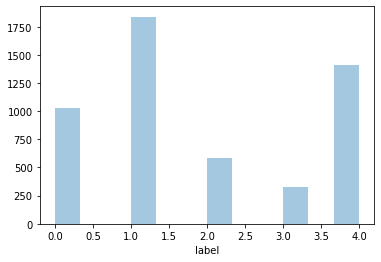

In [439]:
tot=len(train_df)
print(train_df.label.value_counts())
print(train_df.label.value_counts()/tot)
sns.distplot(train_df.label, kde=False)

In [440]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_df.text)
X_train_counts.shape

(5195, 34297)

In [441]:
X_test_counts = count_vect.transform(test_df.text)
X_test_counts.shape

(1732, 34297)

In [442]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(5195, 34297)

In [443]:
X_test_tf = tf_transformer.transform(X_test_counts)
X_test_tf.shape

(1732, 34297)

In [444]:
clf=LogisticRegression(max_iter=200).fit(X_train_tf, train_df.label.astype(str))

array([[ 992,   18,    3,    0,   18],
       [   1, 1819,    7,    5,    7],
       [  10,   29,  520,    0,   23],
       [   9,   18,    9,  284,    9],
       [   6,   10,    0,    0, 1398]], dtype=int64)

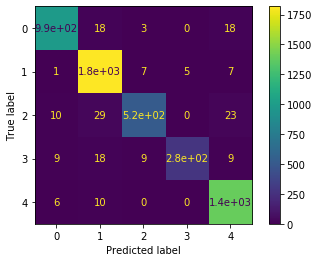

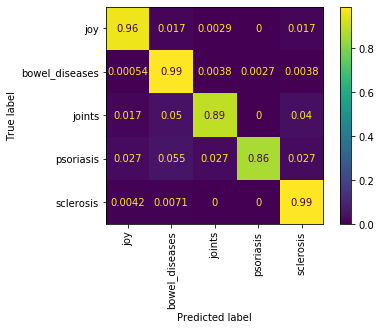

In [445]:
train_predicted=clf.predict(X_train_tf)
cm = confusion_matrix(train_df.label.astype(str), train_predicted)
sklearn.metrics.plot_confusion_matrix(clf, X_train_tf,train_df.label.astype(str))
sklearn.metrics.plot_confusion_matrix(clf, X_train_tf,train_df.label.astype(str),normalize='true'
                                      ,display_labels=com_list,xticks_rotation='vertical')
cm
# sns.heatmap(cm, annot=True, fmt="d")

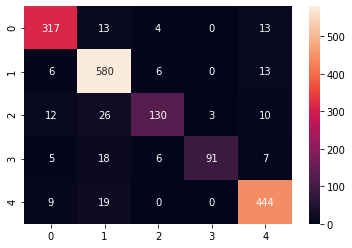

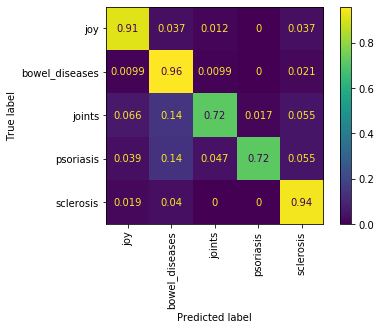

In [446]:
test_predicted=clf.predict(X_test_tf)
cm = confusion_matrix(test_df.label.astype(str), test_predicted)
sns.heatmap(cm, annot=True, fmt="d")
sklearn.metrics.plot_confusion_matrix(clf, X_test_tf,test_df.label.astype(str),normalize='true'
                                      ,display_labels=com_list,xticks_rotation='vertical')

In [450]:
import sklearn
sklearn.metrics.f1_score(test_df.label.astype(str), test_predicted, average='macro')
sklearn.metrics.precision_recall_fscore_support(test_df.label.astype(str), test_predicted, average='macro')
print('for training set, precision: %.2f, recall: %.2f, F1 score: %.2f %s' % 
      sklearn.metrics.precision_recall_fscore_support(train_df.label.astype(str), train_predicted, average='macro', ))
print('for test set, precision: %.2f, recall: %.2f, F1 score: %.2f %s' % 
      sklearn.metrics.precision_recall_fscore_support(test_df.label.astype(str), test_predicted, average='macro', ))

for training set, precision: 0.97, recall: 0.94, F1 score: 0.95 None
for test set, precision: 0.91, recall: 0.85, F1 score: 0.88 None


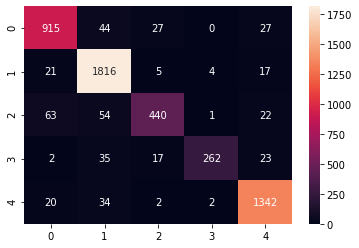

In [93]:
# without Dr Gur
train_predicted=clf.predict(X_train_tf)
cm = confusion_matrix(train_df.label.astype(str), train_predicted)
sns.heatmap(cm, annot=True, fmt="d")

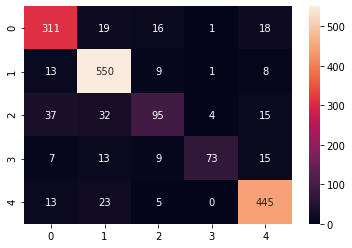

In [94]:
# without Dr Gur
test_predicted=clf.predict(X_test_tf)
cm = confusion_matrix(test_df.label.astype(str), test_predicted)
sns.heatmap(cm, annot=True, fmt="d")

In [451]:
print(clf.coef_)

[[ 0.02736181 -0.00670494 -0.00385985 ... -0.00222348 -0.00106479
  -0.00145568]
 [-0.00354348 -0.01221761  0.01581386 ...  0.00605757 -0.00429192
   0.01148532]
 [-0.01822531 -0.00453426 -0.00780161 ... -0.00027868  0.00612158
  -0.00568639]
 [-0.00261952 -0.00228255 -0.00114626 ... -0.00046271 -0.00036551
  -0.00157508]
 [-0.0029735   0.02573935 -0.00300613 ... -0.00309269 -0.00039937
  -0.00276817]]


In [452]:
inverse_dict={count_vect.vocabulary_[w]:w for w in count_vect.vocabulary_.keys()}
print(inverse_dict[0])
print(inverse_dict[7111])

aa
בשוודיהזהו


In [469]:
def get_strongest_words(label):
    cur_coef=clf.coef_[label]
    word_df=pd.DataFrame({"val":cur_coef}).reset_index().sort_values(["val"],ascending=[False])
    word_df.loc[:, "word"]=word_df["index"].apply(lambda v:inverse_dict[v])
    print(word_df.head(20))
    print('\n\t\tsum of vals: %.2f' % (word_df.val.sum()))

In [455]:
def plot_strongest_words(label):
    cur_coef=clf.coef_[label]
    word_df=pd.DataFrame({"val":cur_coef}).reset_index().sort_values(["val"],ascending=[False])
    word_df.loc[:, "word"]=word_df["index"].apply(lambda v:inverse_dict[v])
    plt.plot(word_df.reset_index().val.head(100))
    plt.show()

In [473]:
com_list = ['Pain', 'Crohn & Colitis', 'Joints', 'Psoriasis', 'Multiple Sclerosis']

In [474]:
for i,community in enumerate(com_list):
    print('\n\t\t',community, 'Community\n')
    get_strongest_words(i)


		 Pain Community

       index       val          word
2535    2535  4.133672            אב
21880  21880  3.410843         מרפאה
24097  24097  3.092091           סבל
9184    9184  3.044691           הוא
26176  26176  2.364842           עצב
13878  13878  2.258573           חזק
6093    6093  1.913615           בטן
32880  32880  1.876424          שריר
3706    3706  1.798996            אי
5068    5068  1.722622            אף
8760    8760  1.717423            דר
33239  33239  1.689799          תודה
31760  31760  1.680836           שום
8440    8440  1.660862          דיסק
26928  26928  1.618873  פיברומיאלגיה
26181  26181  1.608939          עצבי
18192  18192  1.581215        ליריקה
4680    4680  1.539244           אנא
17971  17971  1.505681           לחץ
4287    4287  1.500596           אלא

		sum of vals: 70.64

		 Crohn & Colitis Community

       index       val          word
21308  21308  5.225829           מעי
15524  15524  3.156059        יומירה
16636  16636  2.981503           כאב
91


 joy


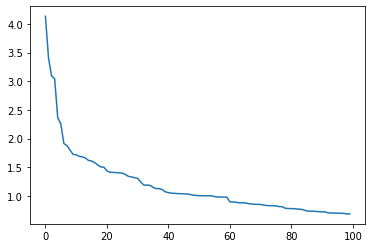


 bowel_diseases


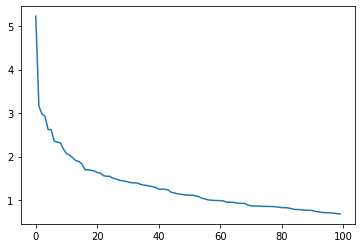


 joints


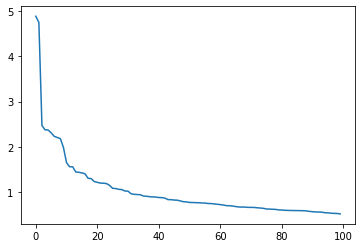


 psoriasis


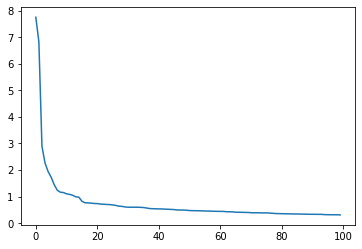


 sclerosis


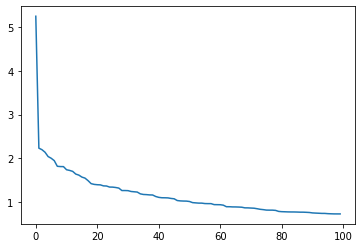

In [456]:
for i,community in enumerate(com_list):
    print('\n',community)
    plot_strongest_words(i)

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train_tf, train_df.label.astype(str))

In [ ]:
rf_prediction=clf.predict(X_test_tfidf)
